In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

file = "california_housing_data.csv"

df = pd.read_csv(file)

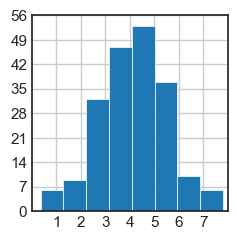

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [101]:

plt.style.use('_mpl-gallery')

np.random.seed(1)

x = 4 + np.random.normal(0, 1.5, 200)

# plot:
fig, ax = plt.subplots()

ax.hist(x, bins=8, linewidth=0.5, edgecolor="white")

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 56), yticks=np.linspace(0, 56, 9))

plt.show()

df.describe()

### Analisi Breve del Dataset (in parole semplici)

- **Reddito medio (MedInc):** il valore medio è **3.87**, con un minimo di 0.49 e un massimo di 15. Questo indica zone con redditi molto diversi tra loro, ma la maggior parte è concentrata tra 2.5 e 4.7.

- **Età delle case (HouseAge):** la media è **28 anni**, con un massimo di 52. Sembra tutto ok

- **Stanze medie (AveRooms):** in media ci sono **5.4 stanze** per abitazione, ma esiste un valore che supera le **140 stanze**, un numero esagerato

- **Camere da letto medie (AveBedrms):** la media è **1.09**, quindi molte abitazioni risultano piccole. qui c’è un valore massimo di oltre **34 camere**, da controllare

- **Popolazione (Population):** varia tantissimo: da **3 persone** fino a oltre **35.000**. Attenzione forze errore da controllare

- **Occupanti medi (AveOccup):** la media è **3 persone** per abitazione, ma c’è un valore che supera i **1200**,  da controllare 

- **Valore medio delle case (MedHouseVal):** la media è **2.06**, con valori che vanno da 0.14 a 5. sembra tutto ok



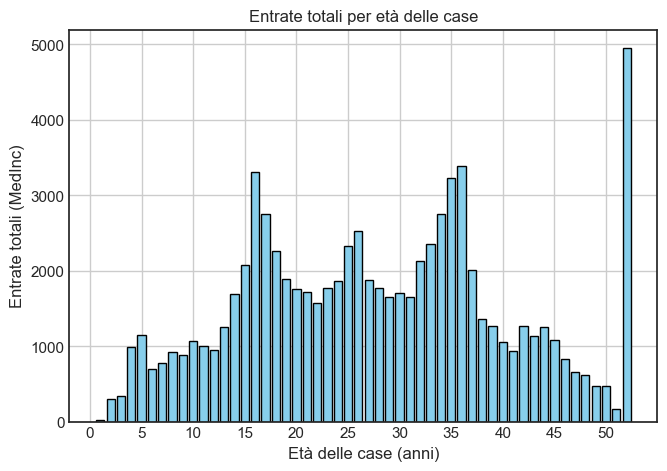

In [102]:
entrate = df.groupby('HouseAge')['MedInc'].sum()

fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(entrate.index, entrate.values, color='skyblue', edgecolor='black')

ax.set_xlabel('Età delle case (anni)')
ax.set_ylabel('Entrate totali (MedInc)')
ax.set_title('Entrate totali per età delle case')

ax.set_xticks(np.arange(0, df['HouseAge'].max() + 1, 5))

plt.show()


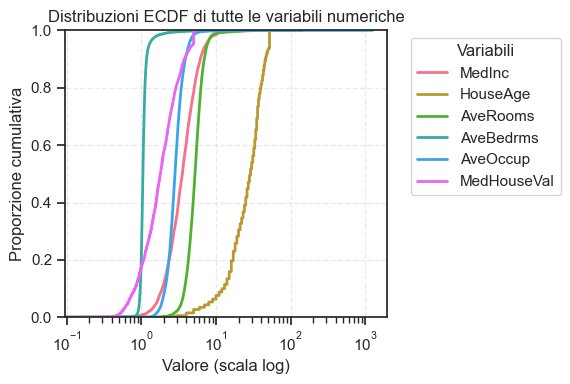

In [103]:
sns.set_theme(style="ticks")

numeric_cols = df.select_dtypes(include='number').columns
numeric_cols = [col for col in numeric_cols if col not in ["Latitude","Longitude","Population"]]

plt.figure(figsize=(6, 4))

palette = sns.color_palette("husl", len(numeric_cols))

for i, col in enumerate(numeric_cols):
    sns.ecdfplot(data=df, x=col, label=col, color=palette[i], linewidth=2)

plt.xscale("log")

plt.title("Distribuzioni ECDF di tutte le variabili numeriche")
plt.xlabel("Valore (scala log)")
plt.ylabel("Proporzione cumulativa")
plt.legend(title="Variabili", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\39392\AppData\Local\Temp\ipykernel_20260\1791414232.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(["Age_Group", "Income_Bin"])["MedHouseVal"].mean().reset_index()


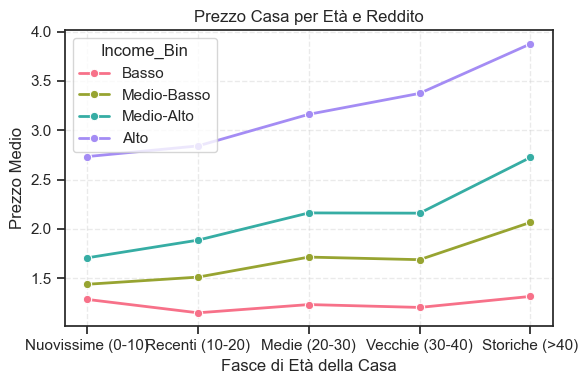

In [104]:
df["Age_Group"] = pd.cut(
    df["HouseAge"],
    bins=[0, 10, 20, 30, 40, df["HouseAge"].max()],
    labels=["Nuovissime (0-10)", "Recenti (10-20)", "Medie (20-30)", "Vecchie (30-40)", "Storiche (>40)"]
)

df["Income_Bin"] = pd.qcut(
    df["MedInc"],
    q=4,
    labels=["Basso", "Medio-Basso", "Medio-Alto", "Alto"]
)

plt.figure(figsize=(6, 4))
grouped = df.groupby(["Age_Group", "Income_Bin"])["MedHouseVal"].mean().reset_index()

sns.lineplot(
    data=grouped,
    x="Age_Group",
    y="MedHouseVal",
    hue="Income_Bin",
    marker="o",
    linewidth=2,
    palette="husl"
)

plt.title("Prezzo Casa per Età e Reddito")
plt.xlabel("Fasce di Età della Casa")
plt.ylabel("Prezzo Medio")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


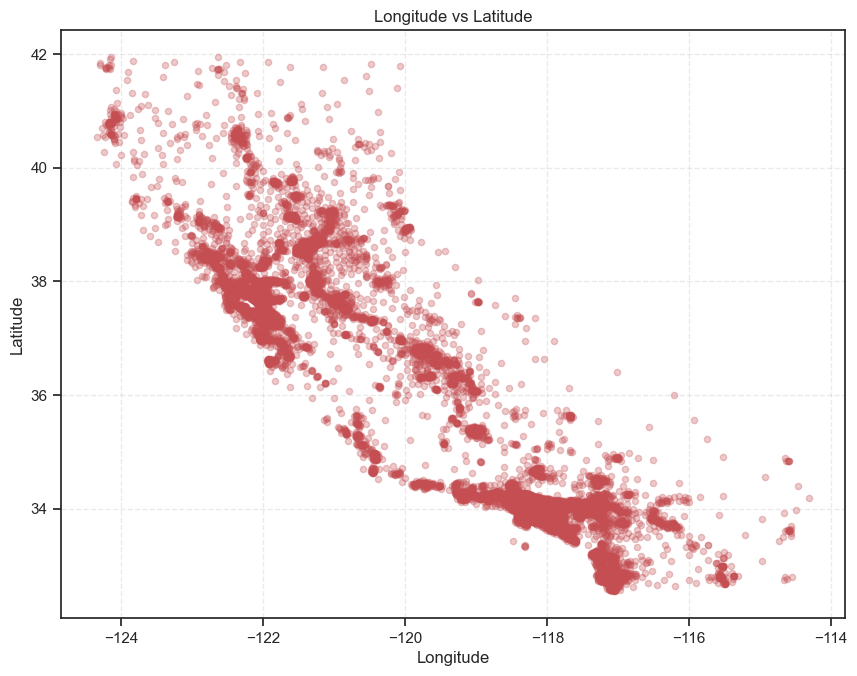

In [105]:
x = df["Longitude"]
y = df["Latitude"]

plt.figure(figsize=(8, 6))

plt.scatter(x, y, s=20, alpha=0.3, color = "r")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Longitude vs Latitude")
plt.grid(True, linestyle="--", alpha=0.4)

plt.show()